<a href="https://www.kaggle.com/code/jaivigneshavikasrm/final?scriptVersionId=253897812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.173 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6407.3/8062.4 GB disk)


In [3]:
%pip install -q roboflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fWKyJMUYrEGuEkxxUXYa")
project = rf.workspace("vengadesa-boopathi-hw5ya").project("final-dataset-ioyjk")
version = project.version(4)
dataset = version.download("yolov8")


  Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Final-Dataset-4 in yolov8:: 100%|██████████| 15956/15956 [00:01<00:00, 8178.28it/s]


In [5]:
with open("/kaggle/working/Final-Dataset-4/data.yaml") as f:
    contents = f.read()
    print(contents)

names:
- Air conditioner
- Air purifier
- Bowl
- Broom
- Brush
- Circle_plate
- Cup
- Cutlery_container
- Dustpan
- Egg beater
- Electric Blender
- Electric Juicer
- Electric Shaver
- Electric brush
- Electric rice cooker
- Fork
- Gas Stove
- Gas-cylinder
- Hair dryer
- Induction stove
- Iron Box
- Knife
- Massage chair
- Microwave
- Mini_fork
- Mug
- Oven
- Pressure cooker
- Shampoo
- Soap
- Spoon
- Square_plate
- Toothbrush
- Toothpaste
- Uncleaned  Tiles
- Uncleaned Object
- Vacuum cleaner
- Washing machine
- Water dispenser
- Water kettle
- Water purifier
- Wi-Fi device
- bathtub-clean
- blender
- blender cup
- bottle
- bowl
- cabinet
- carpet
- clock
- closet-clean
- coffee bottle
- cupboard
- dish cloth
- dishwasher
- door
- drawer
- drinks shelf
- geyser-clean
- glass bottle
- glass jar
- juicer
- kettle
- kitchen sink
- light
- metal bottle
- mirror-clean
- modem
- outlet
- oven
- pan
- paper towel
- plastic bag
- plate
- pot
- refrigerator
- sandwich grill
- showerhead-clean
-

In [6]:
yaml_text = """


names:
- Air conditioner
- Air purifier
- Bowl
- Broom
- Brush
- Circle_plate
- Cup
- Cutlery_container
- Dustpan
- Egg beater
- Electric Blender
- Electric Juicer
- Electric Shaver
- Electric brush
- Electric rice cooker
- Fork
- Gas Stove
- Gas-cylinder
- Hair dryer
- Induction stove
- Iron Box
- Knife
- Massage chair
- Microwave
- Mini_fork
- Mug
- Oven
- Pressure cooker
- Shampoo
- Soap
- Spoon
- Square_plate
- Toothbrush
- Toothpaste
- Uncleaned  Tiles
- Uncleaned Object
- Vacuum cleaner
- Washing machine
- Water dispenser
- Water kettle
- Water purifier
- Wi-Fi device
- bathtub-clean
- blender
- blender cup
- bottle
- bowl
- cabinet
- carpet
- clock
- closet-clean
- coffee bottle
- cupboard
- dish cloth
- dishwasher
- door
- drawer
- drinks shelf
- geyser-clean
- glass bottle
- glass jar
- juicer
- kettle
- kitchen sink
- light
- metal bottle
- mirror-clean
- modem
- outlet
- oven
- pan
- paper towel
- plastic bag
- plate
- pot
- refrigerator
- sandwich grill
- showerhead-clean
- sink-clean
- stains
- sugar bowl
- toilet-clean
- towel-clean
- trash bin
- washbasin-clean
- washmachine
- water closet-clean
- water filter
nc: 88
roboflow:
  license: CC BY 4.0
  project: final-dataset-ioyjk
  url: https://universe.roboflow.com/vengadesa-boopathi-hw5ya/final-dataset-ioyjk/dataset/4
  version: 4
  workspace: vengadesa-boopathi-hw5ya
test: /kaggle/working/Final-Dataset-4/test/images
train: /kaggle/working/Final-Dataset-4/train/images
val: /kaggle/working/Final-Dataset-4/valid/images


"""

with open("/kaggle/working/Final-Dataset-4/data.yaml", 'w') as file:
    file.write(yaml_text)

In [7]:
!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/Final-Dataset-4/data.yaml epochs=50 imgsz=640 plots=true

Ultralytics 8.3.173 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Final-Dataset-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

In [8]:
!ls /kaggle/working/runs/detect/train

BoxF1_curve.png			 labels_correlogram.jpg  train_batch2.jpg
BoxPR_curve.png			 results.csv		 val_batch0_labels.jpg
BoxP_curve.png			 results.png		 val_batch0_pred.jpg
BoxR_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch13960.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch13961.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch13962.jpg	 weights


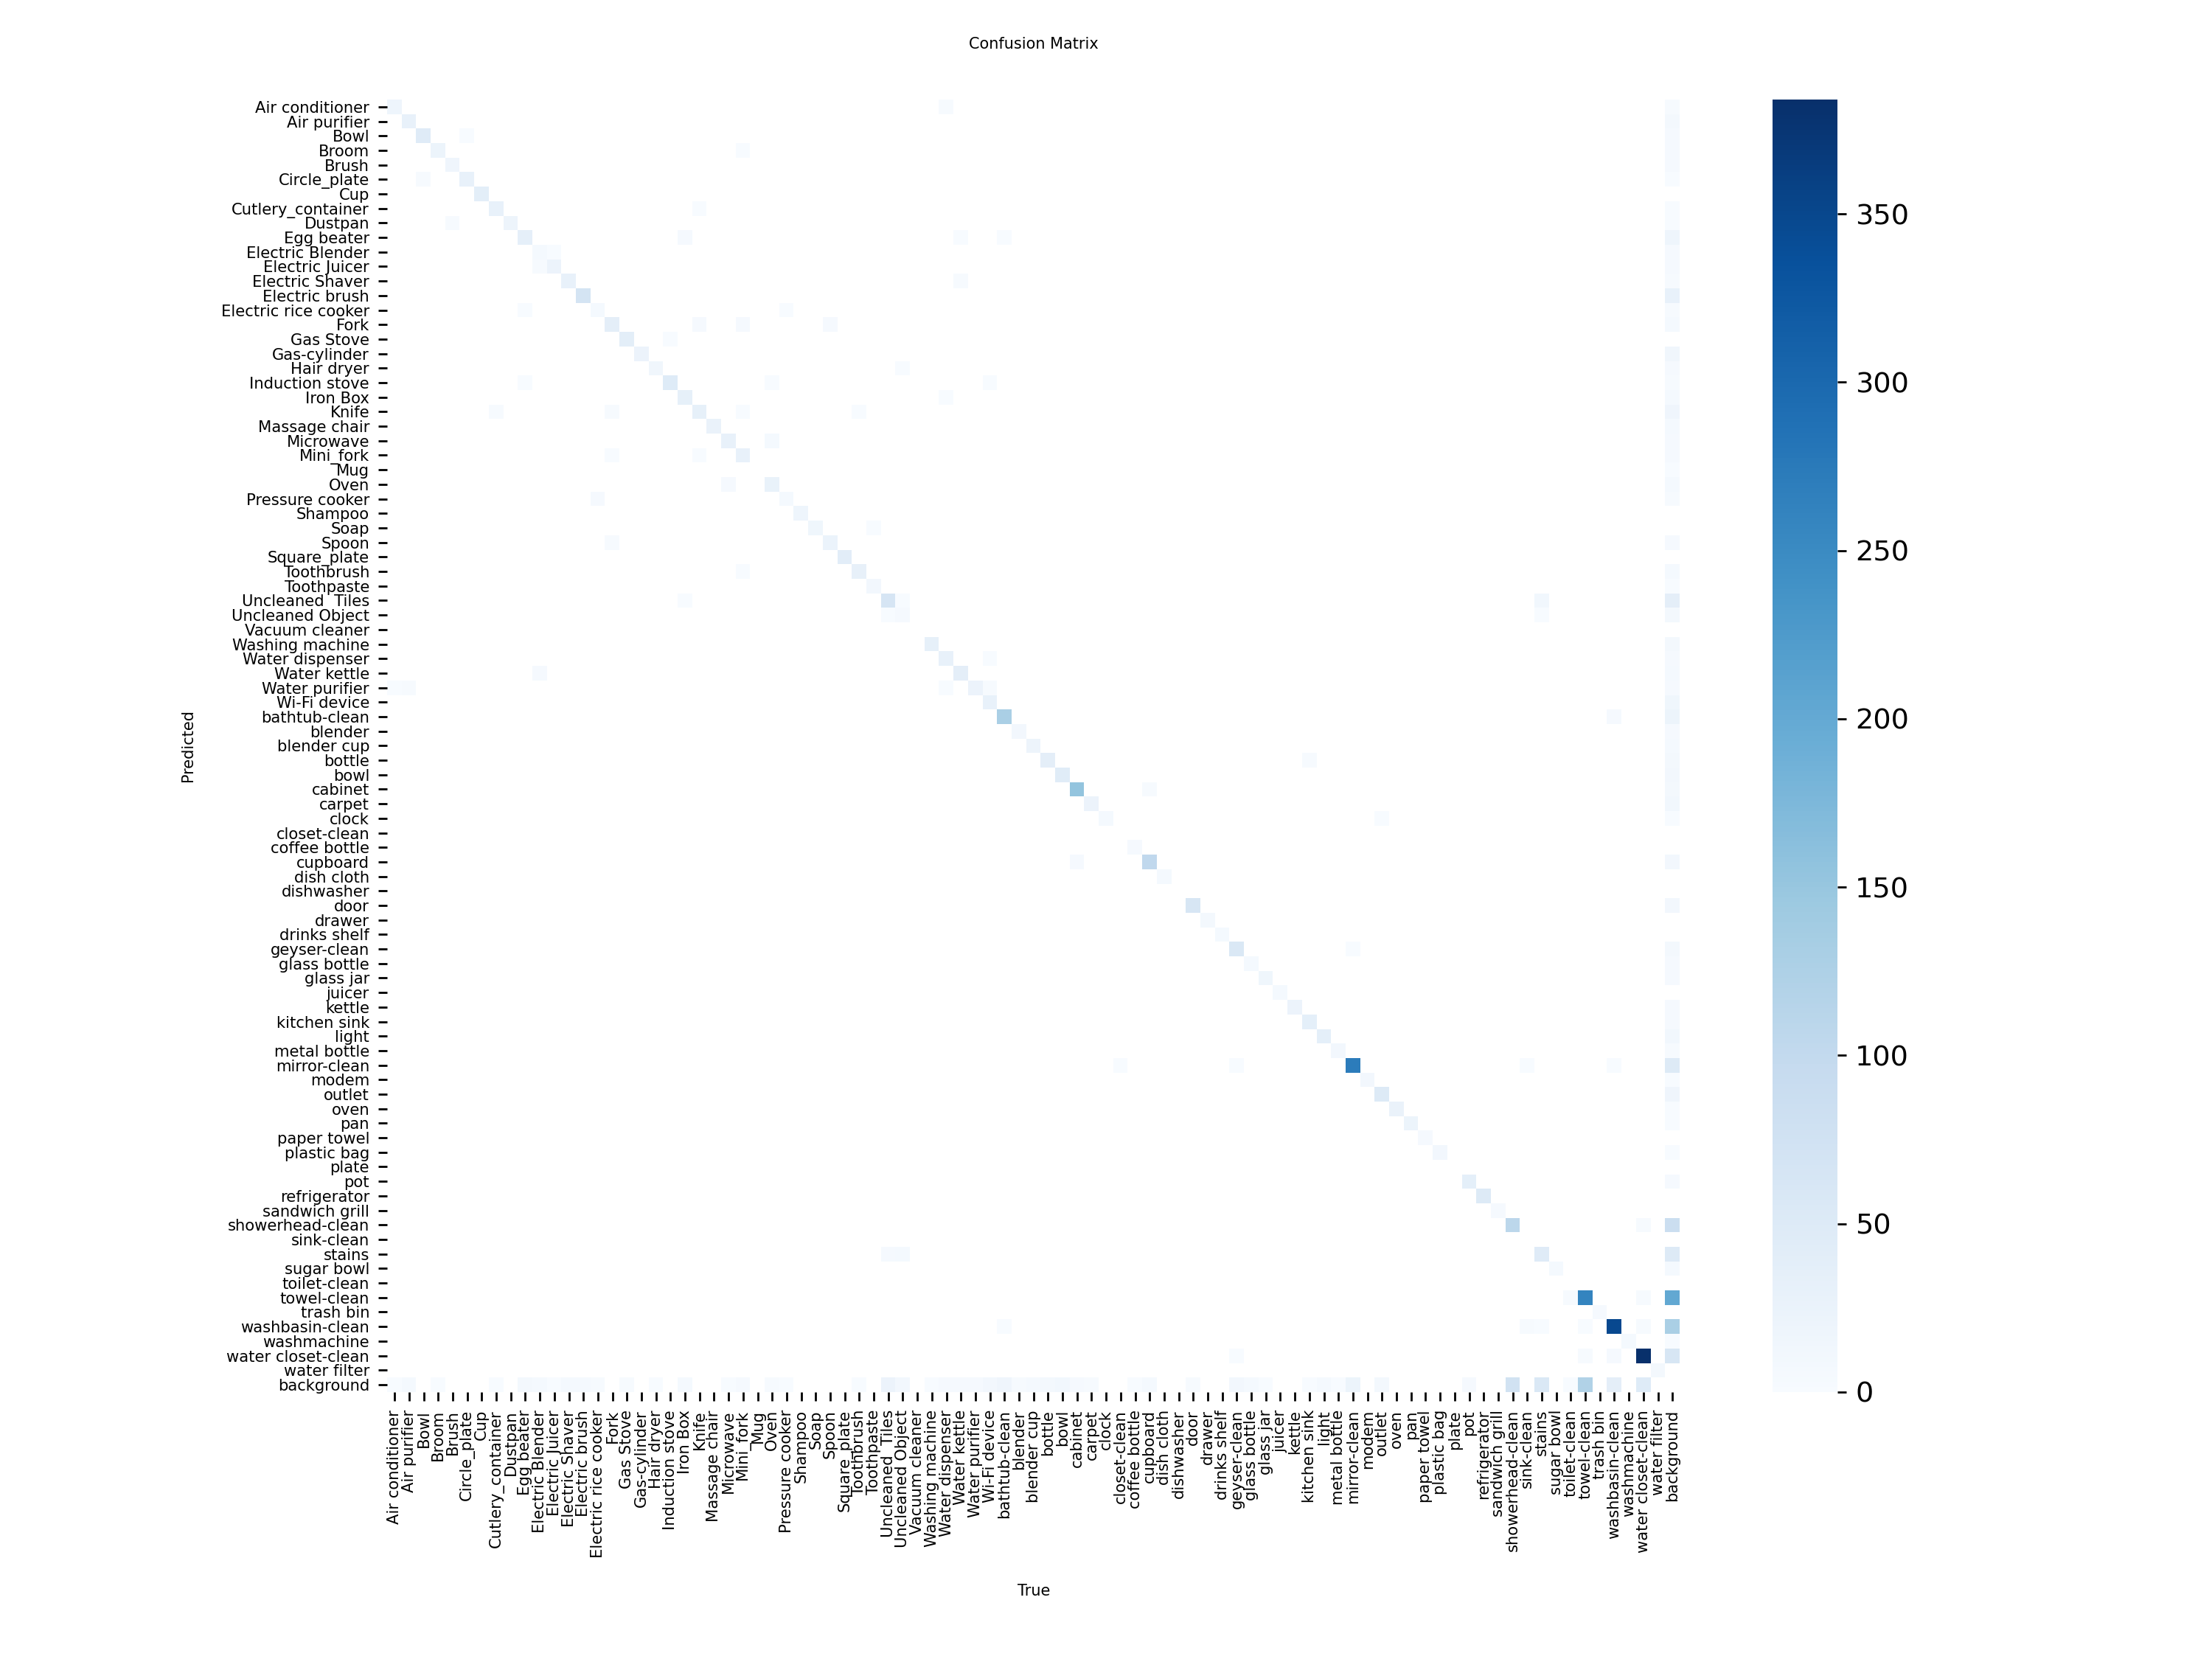

In [9]:
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png',width=1000)

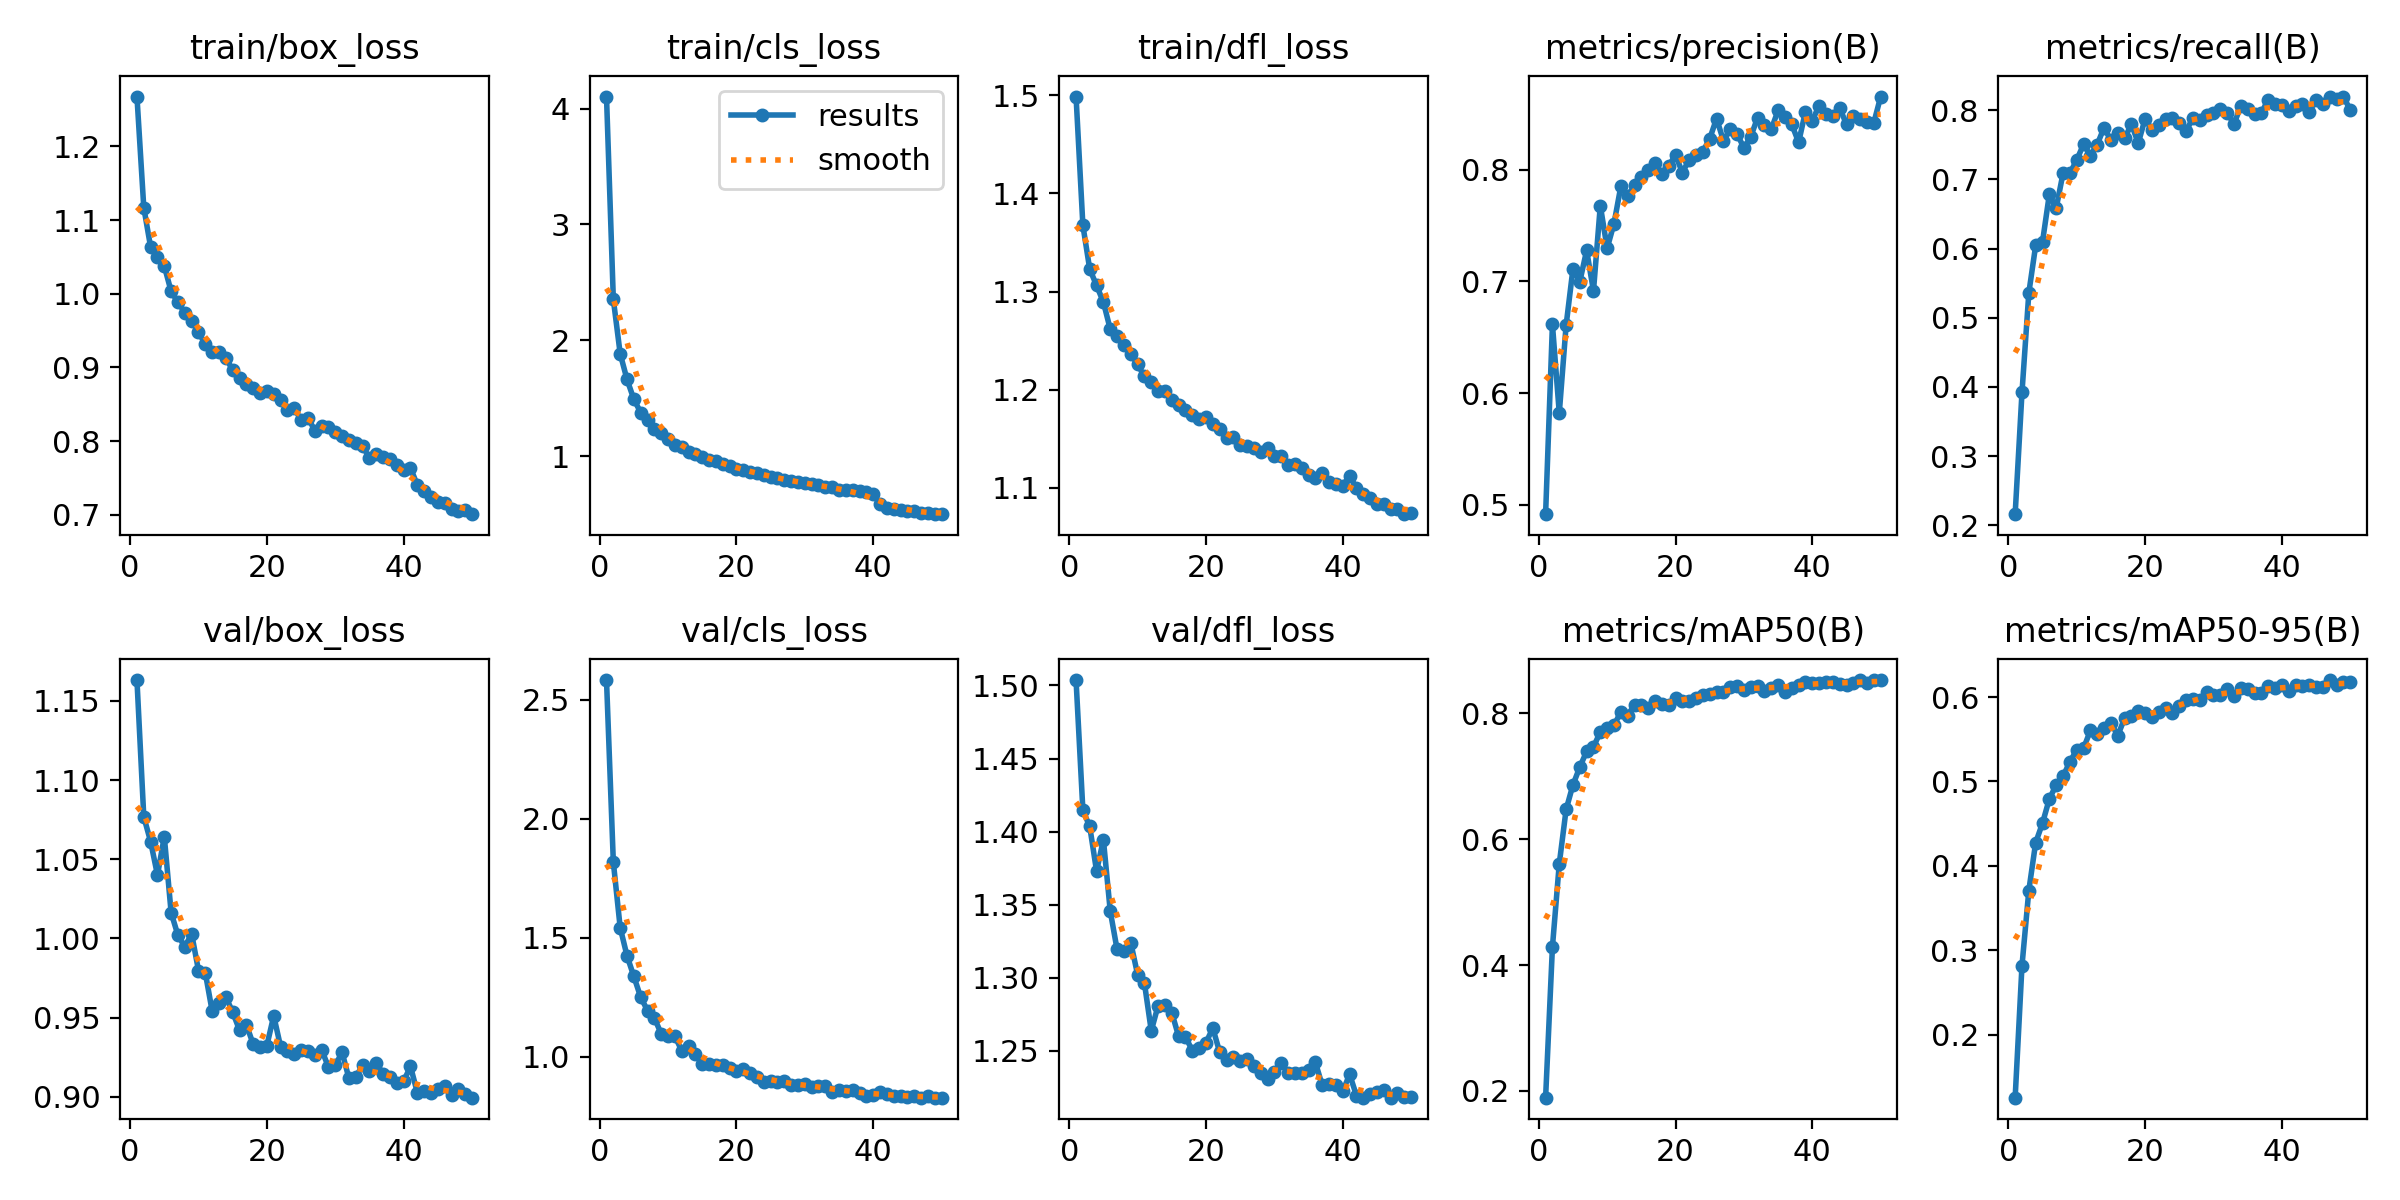

In [10]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png',width=1000)

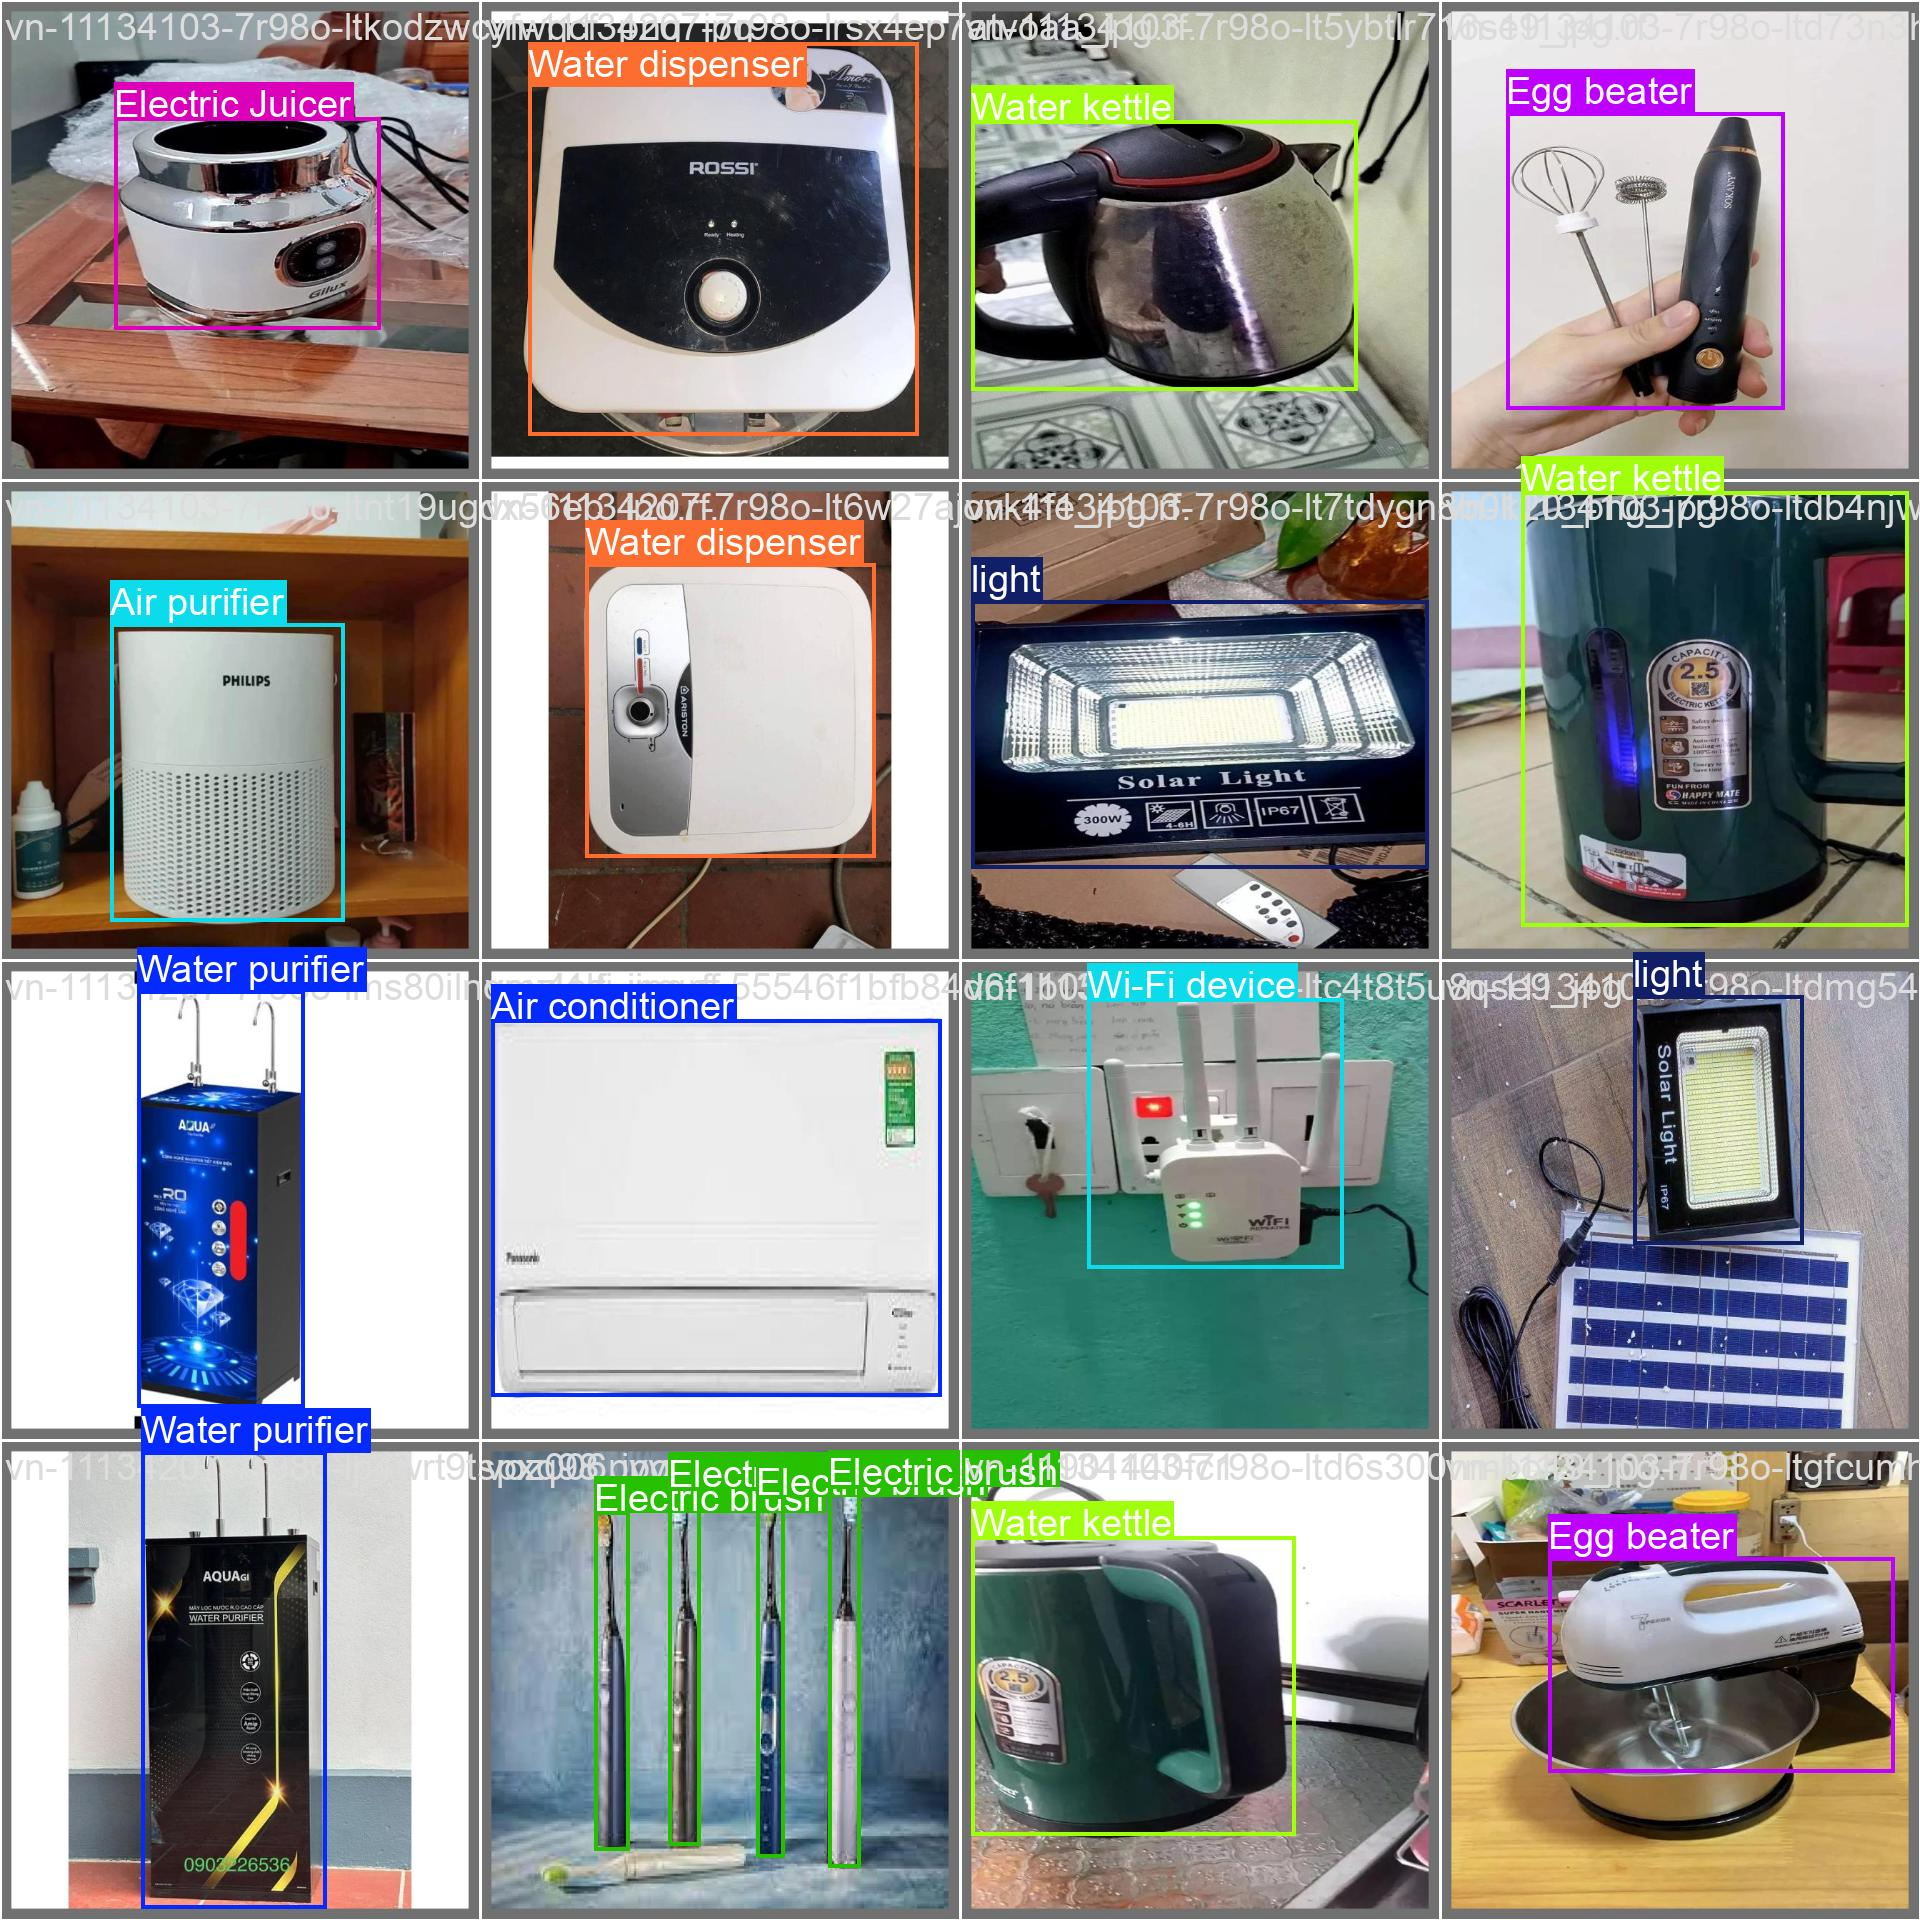

In [11]:
Image(filename=f'/kaggle/working/runs/detect/train/val_batch0_labels.jpg',width=1000)

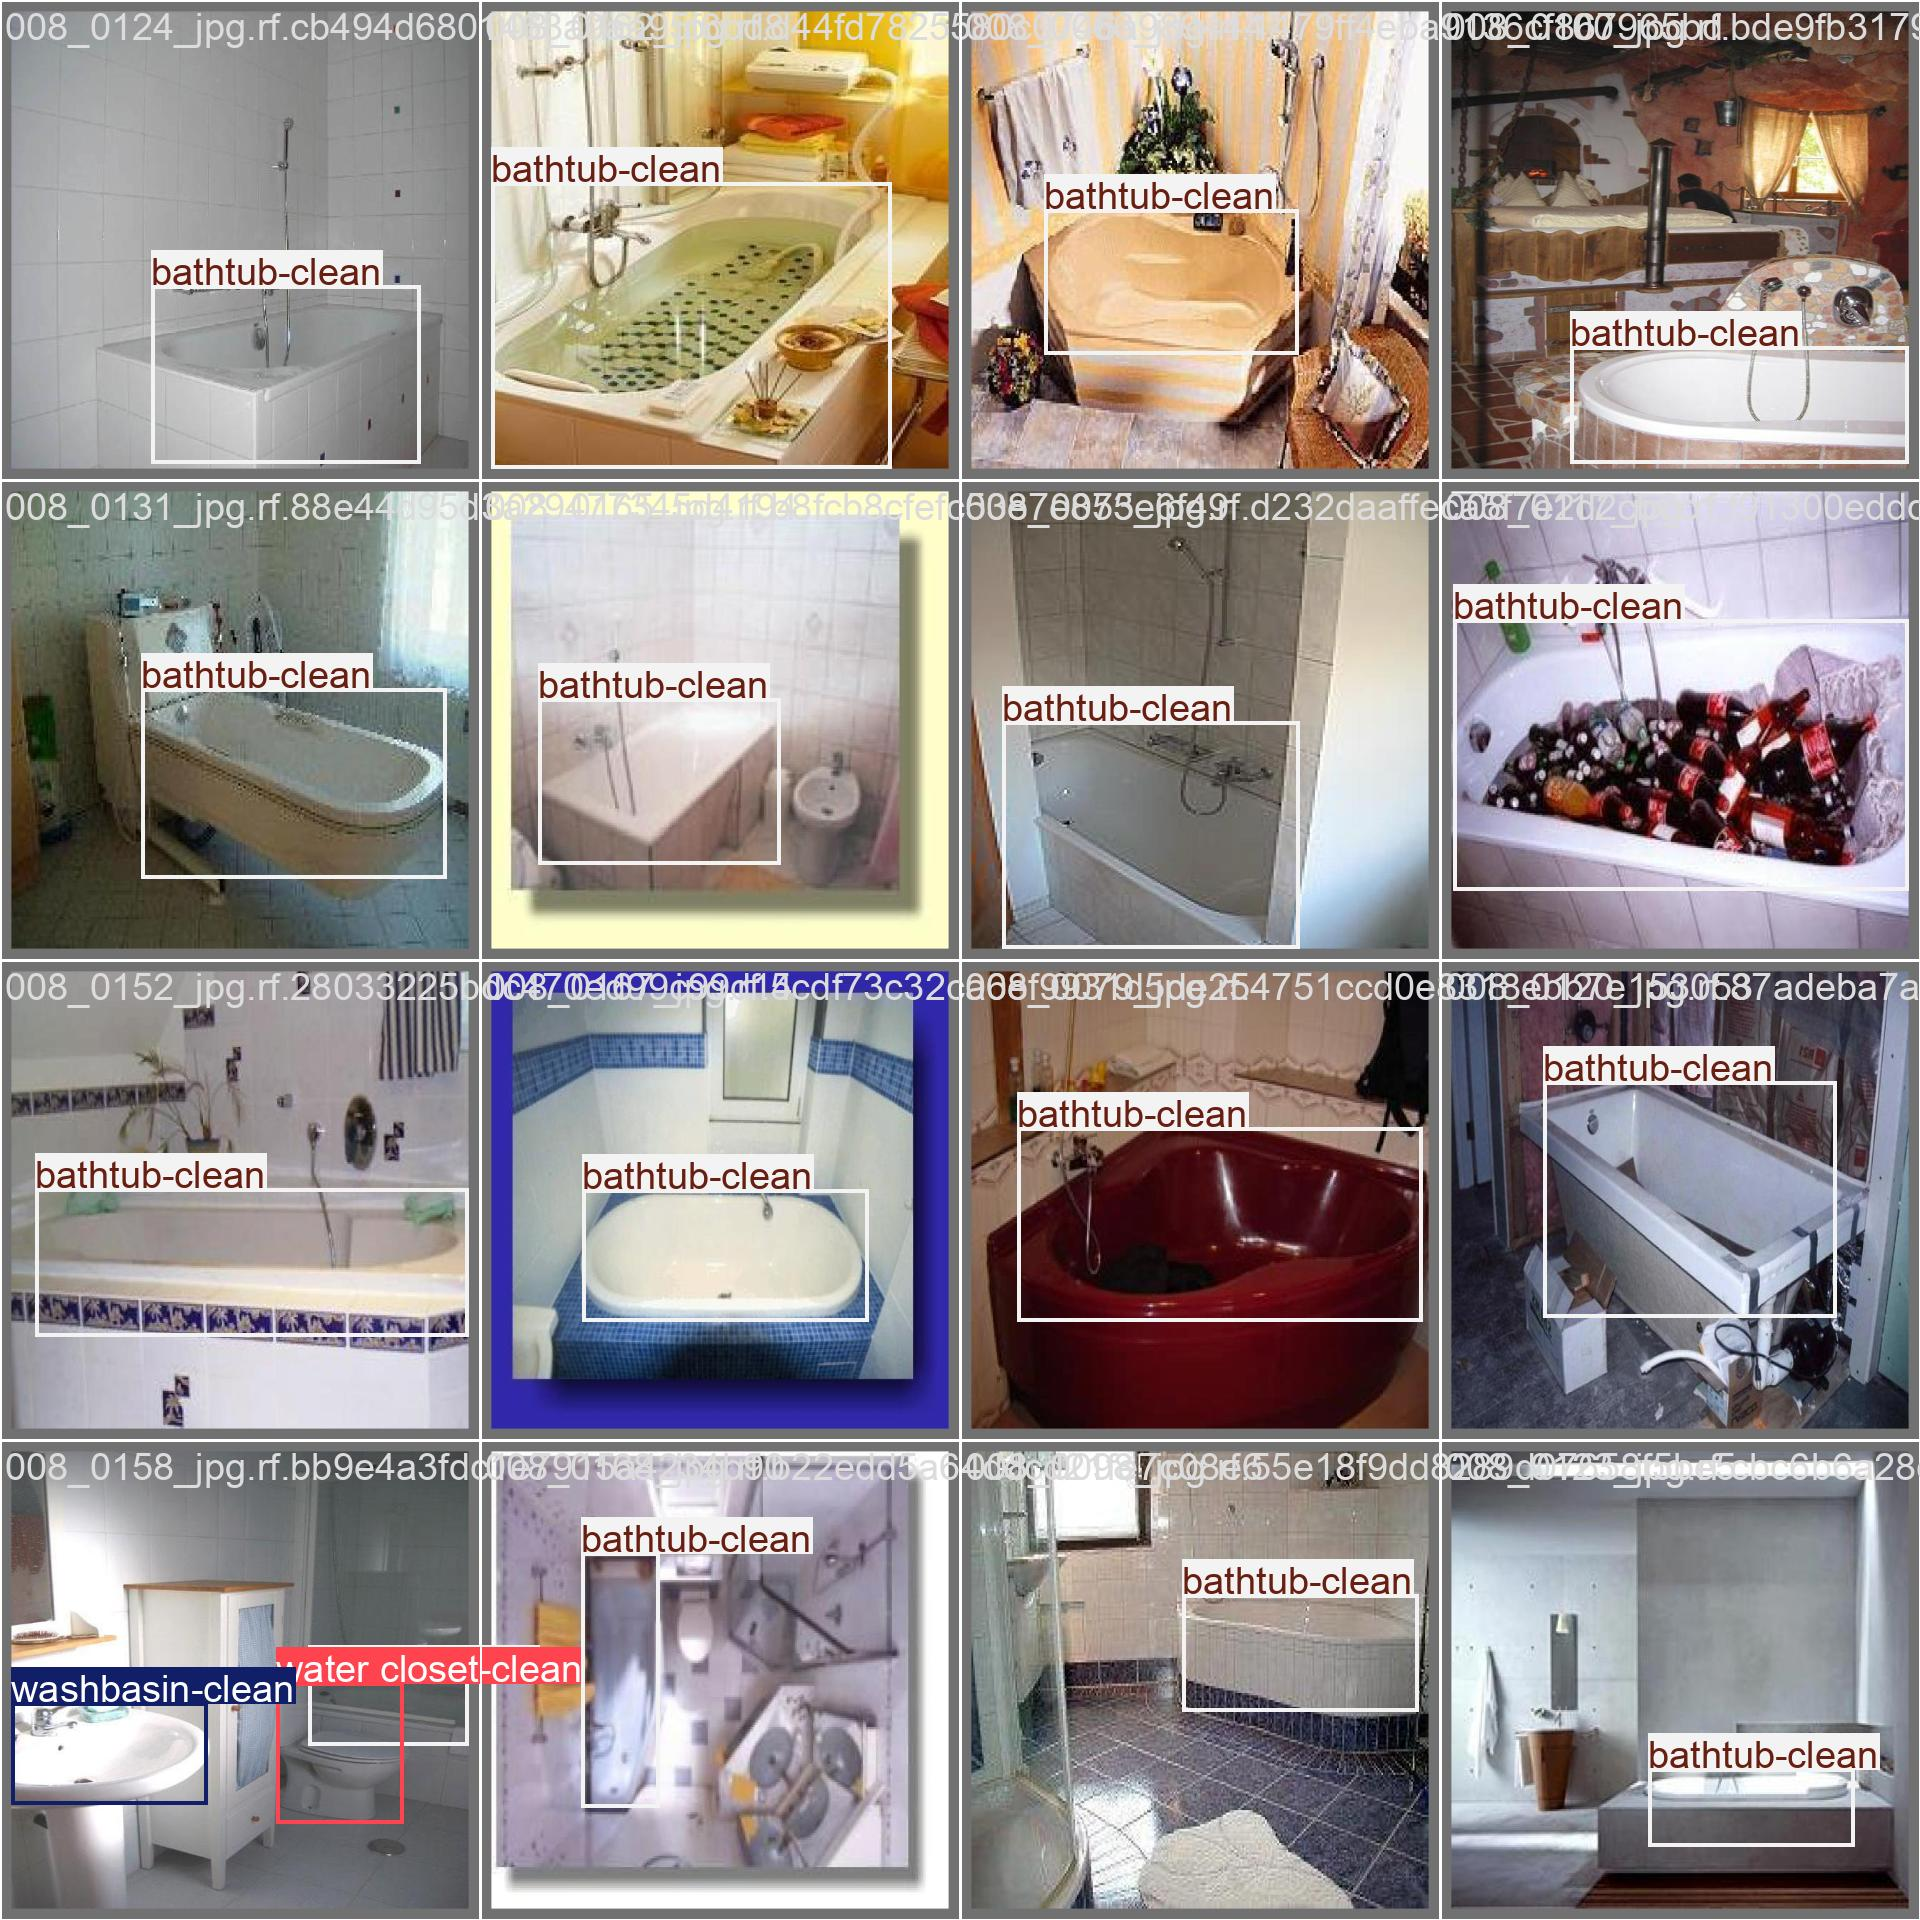

In [12]:
Image(filename=f'/kaggle/working/runs/detect/train/val_batch1_labels.jpg',width=1000)

In [13]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/Final-Dataset-4/test/images save=True

Ultralytics 8.3.173 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,159,640 parameters, 0 gradients, 28.6 GFLOPs

image 1/804 /kaggle/working/Final-Dataset-4/test/images/000p0x72_jpg.rf.436f166eff422abd152847fe51990fee.jpg: 640x640 1 Egg beater, 1 Electric Blender, 16.2ms
image 2/804 /kaggle/working/Final-Dataset-4/test/images/008_0029_jpg.rf.6652bbd6f8d2fab1e1841a2eeef29d10.jpg: 640x640 1 bathtub-clean, 16.2ms
image 3/804 /kaggle/working/Final-Dataset-4/test/images/008_0030_jpg.rf.524ba6de6efd7785403a88563ad3516d.jpg: 640x640 1 bathtub-clean, 16.2ms
image 4/804 /kaggle/working/Final-Dataset-4/test/images/008_0070_jpg.rf.7e6927969cdc8e7d750d1b5c131aeb95.jpg: 640x640 1 Water dispenser, 1 Wi-Fi device, 16.2ms
image 5/804 /kaggle/working/Final-Dataset-4/test/images/008_0077_jpg.rf.77f96b6ff703be246028a841adfa1568.jpg: 640x640 1 bathtub-clean, 16.2ms
image 6/804 /kaggle/working/Final-Dataset-4/test/images/008_0078_jpg.rf.926378b9edca9efe64aef14

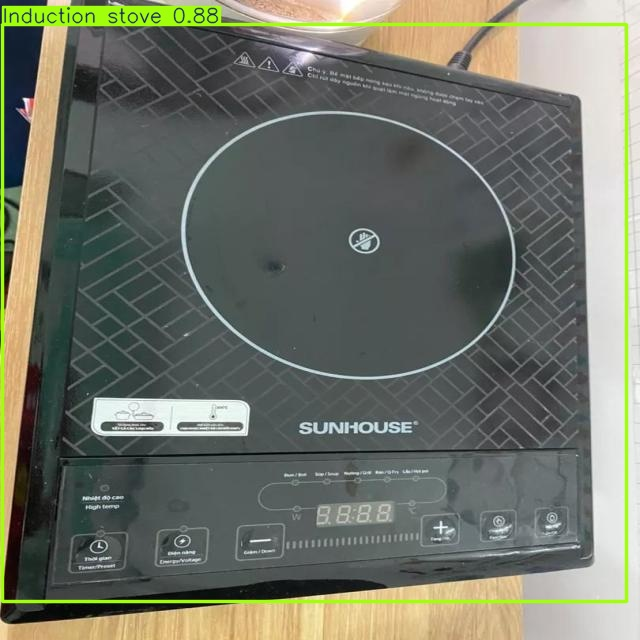

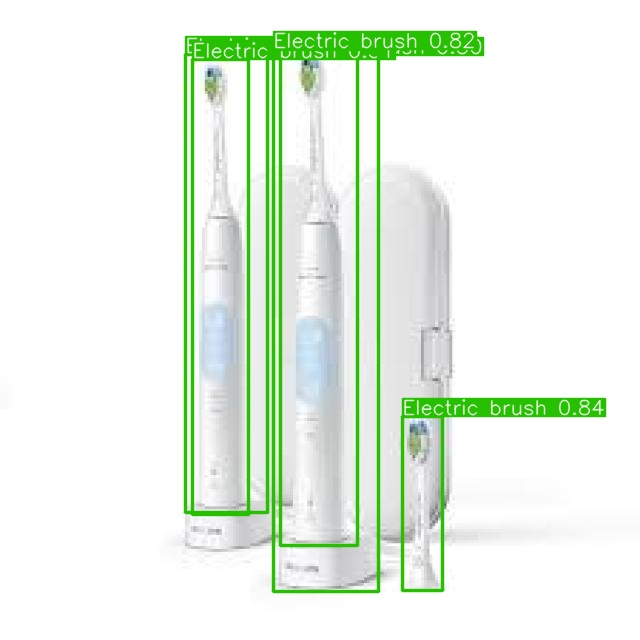

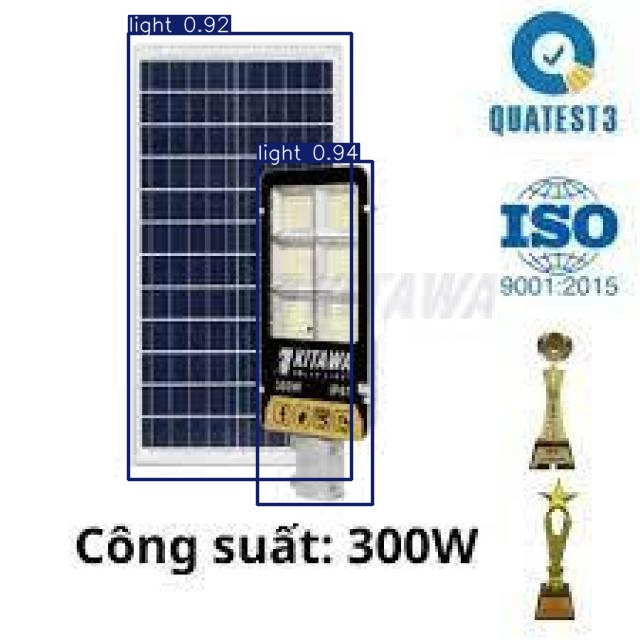

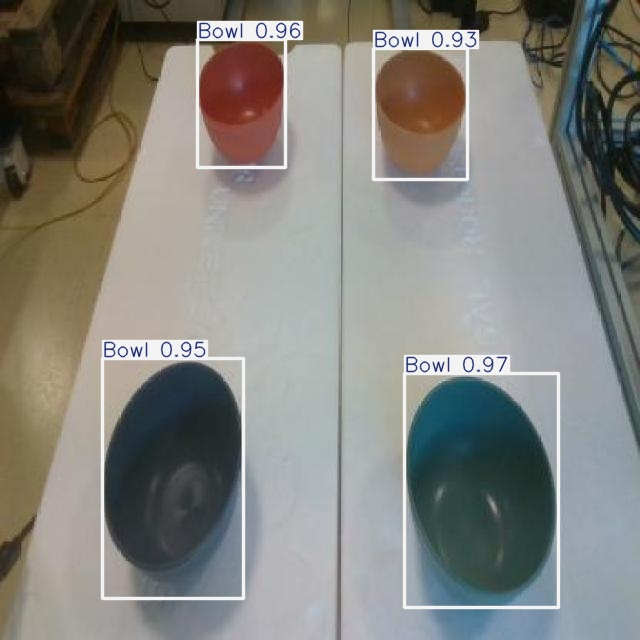

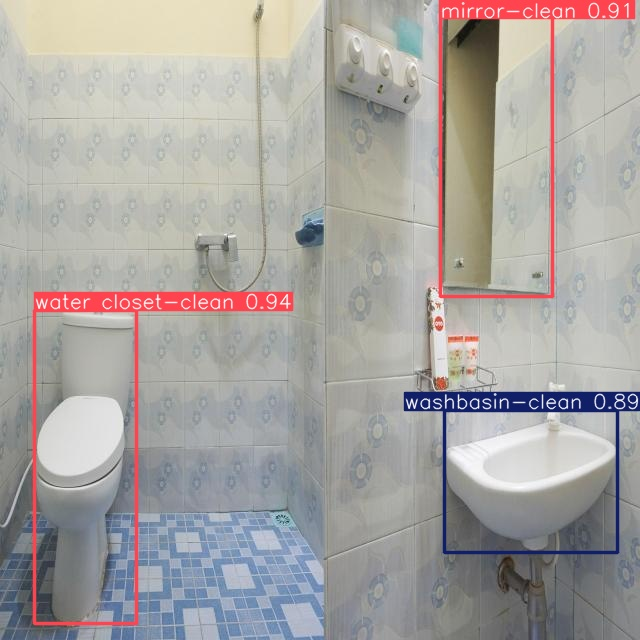

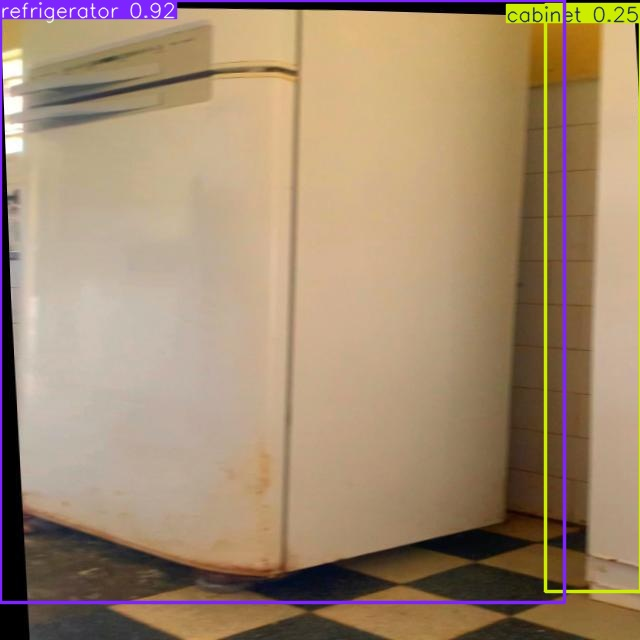

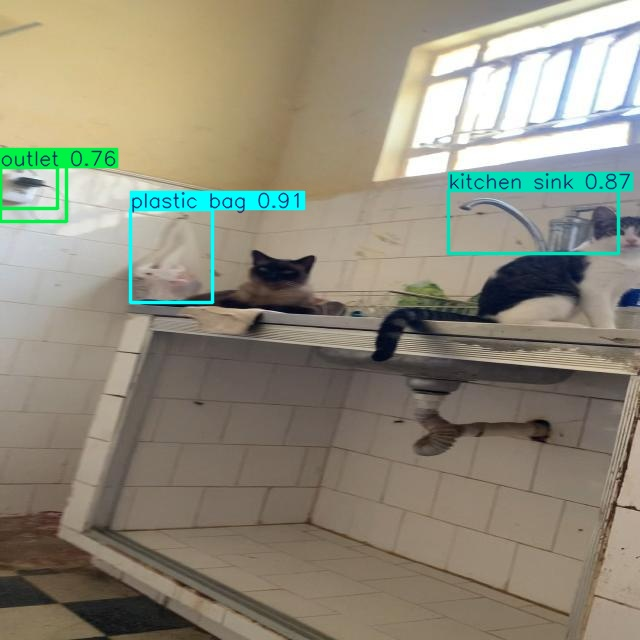

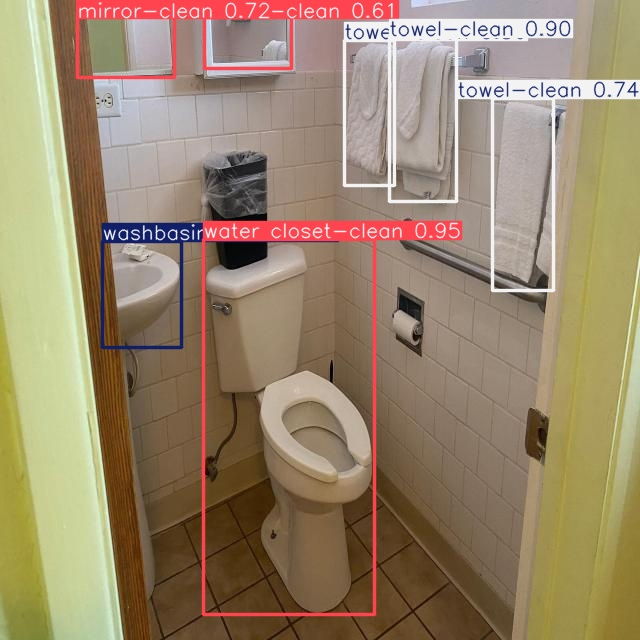

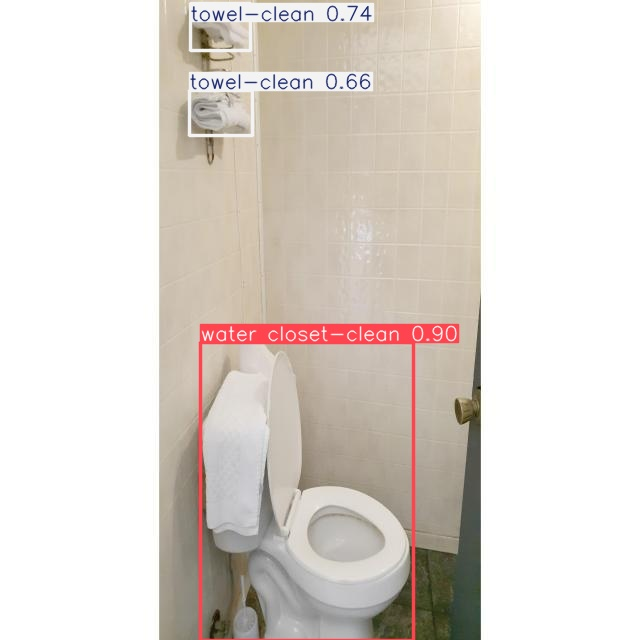

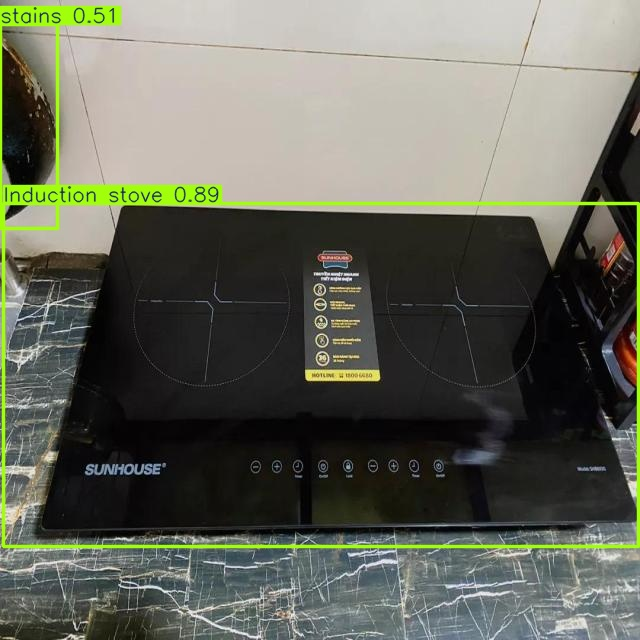

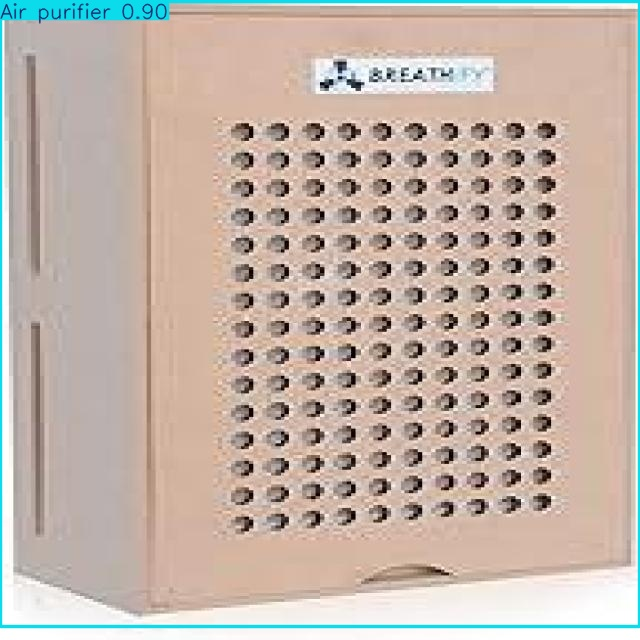

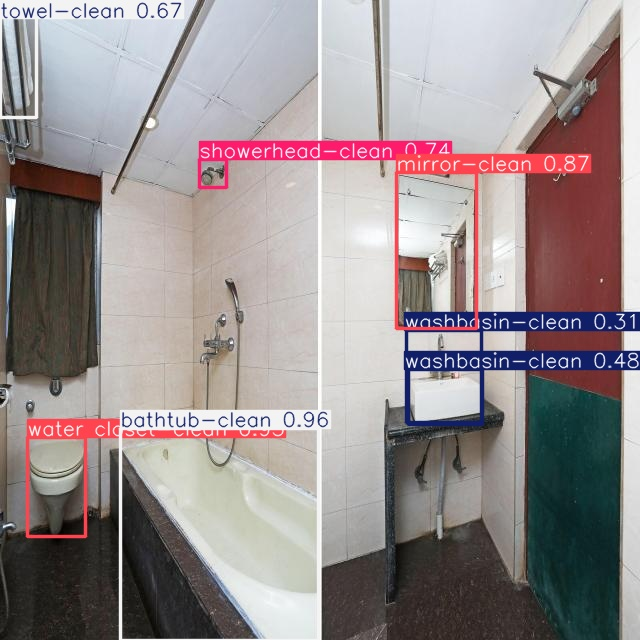

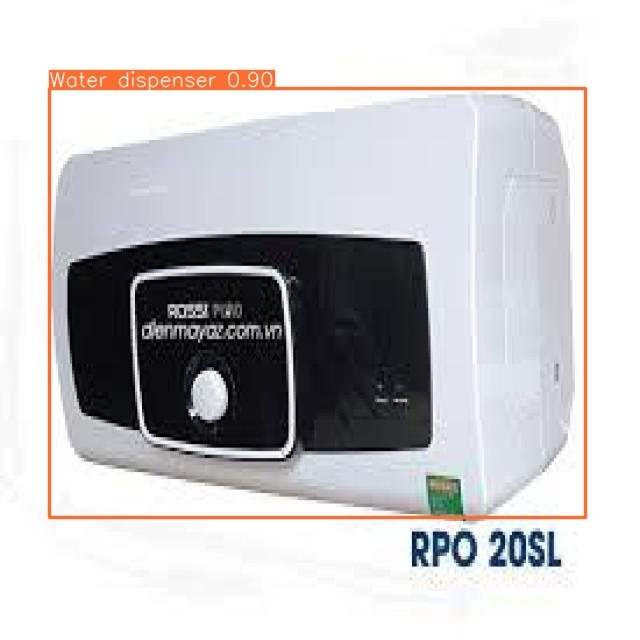

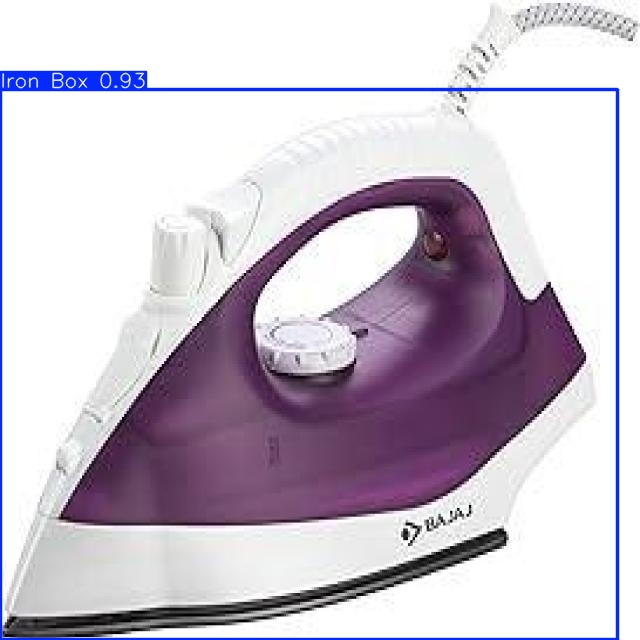

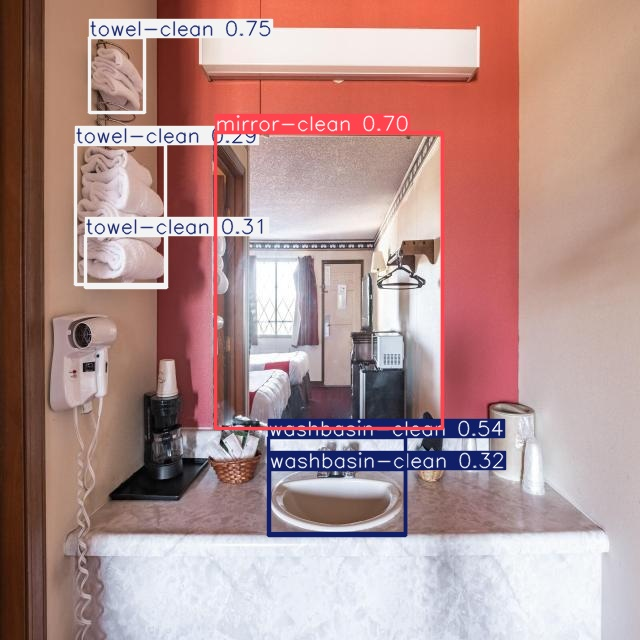

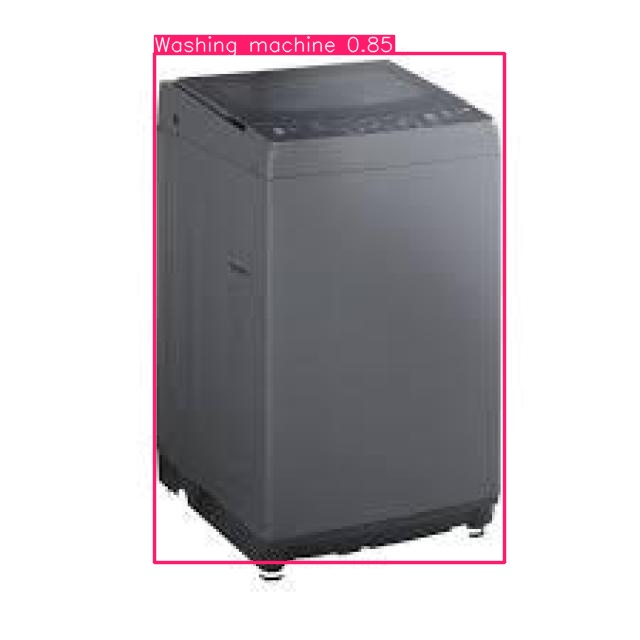

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[100:116]:
      display(Image(filename=image_path, width=500))
      

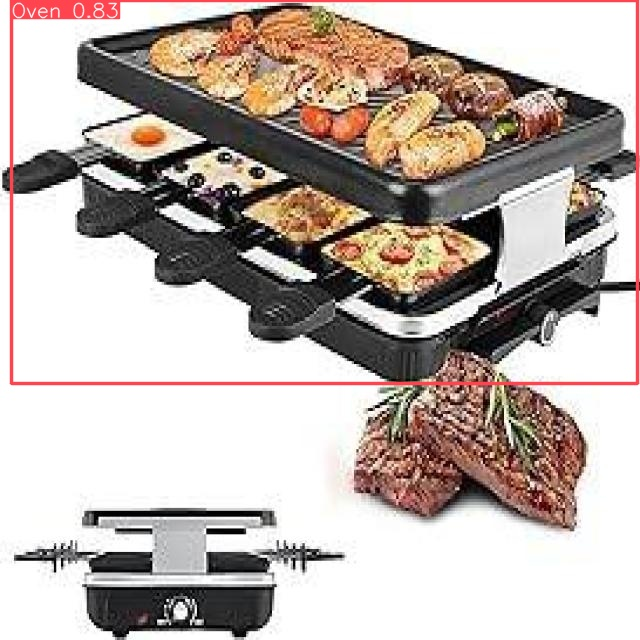

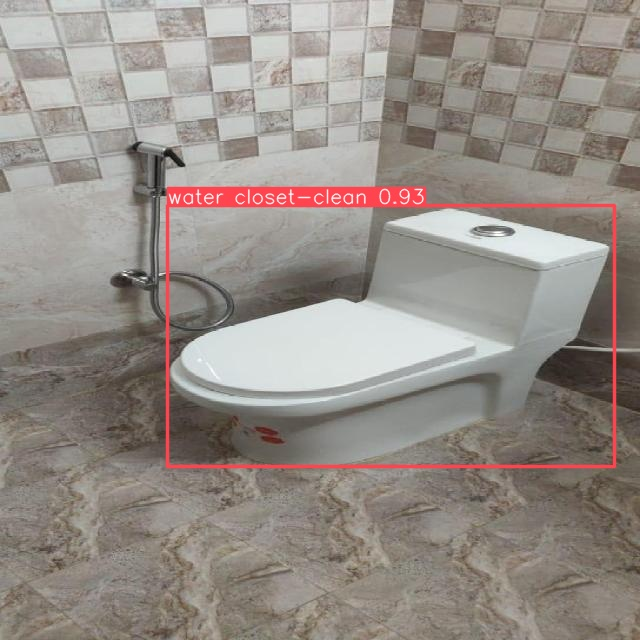

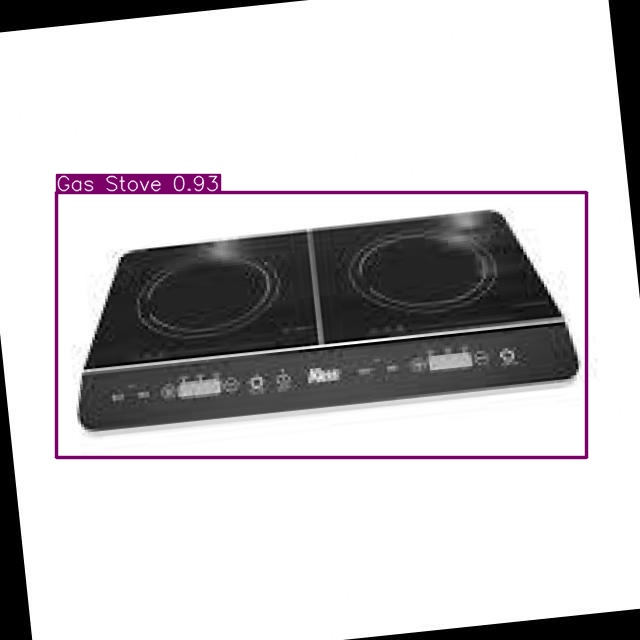

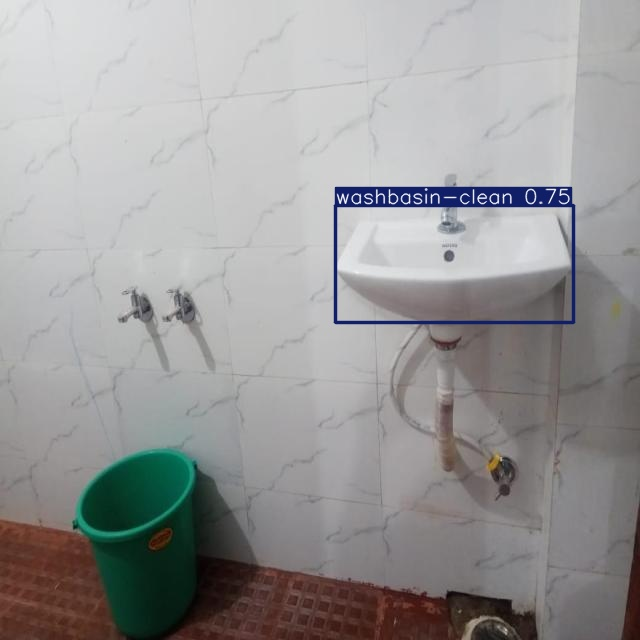

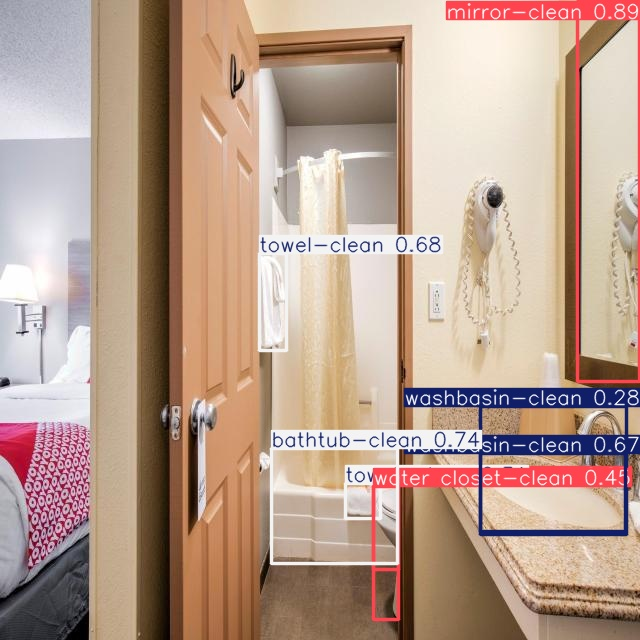

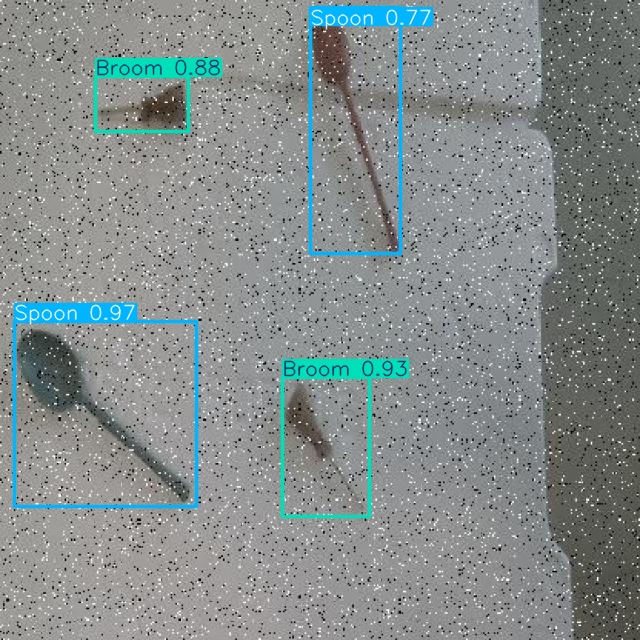

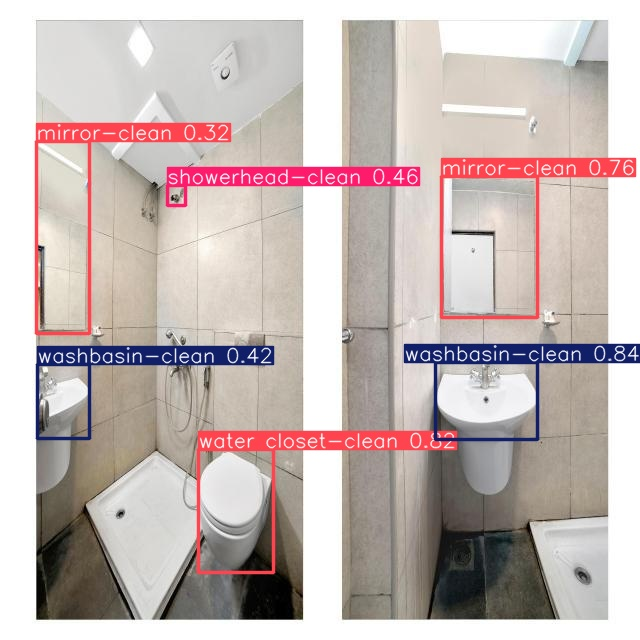

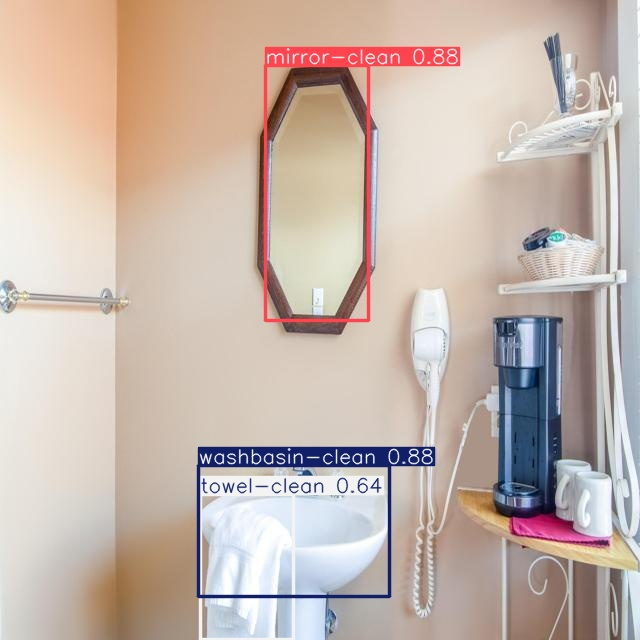

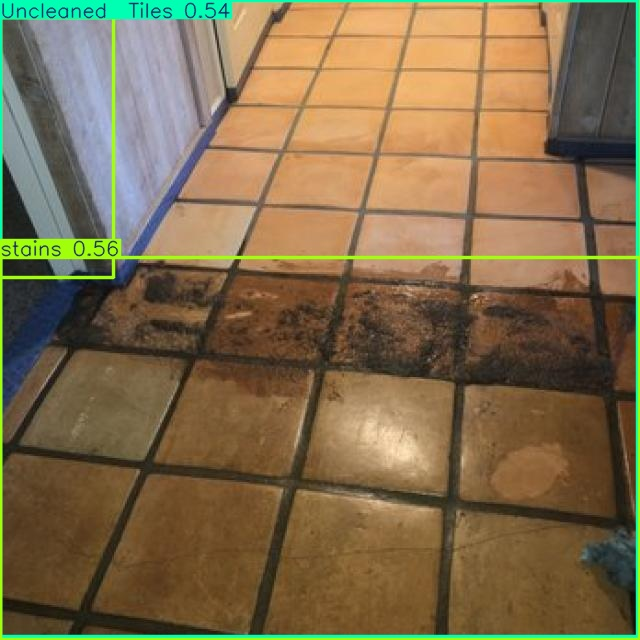

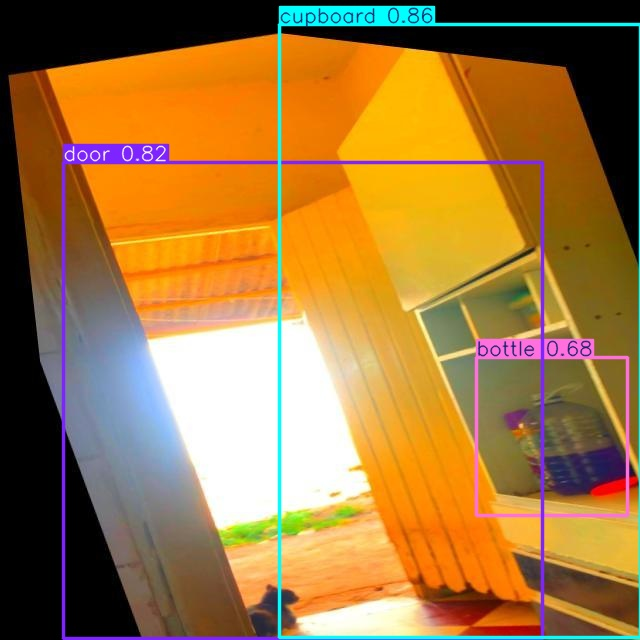

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[150:160]:
      display(Image(filename=image_path, width=500))
      

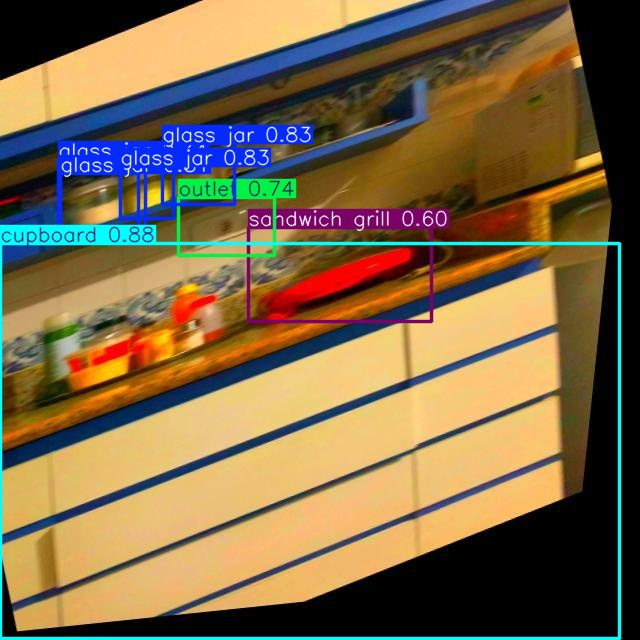

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/IMG_7813_MOV-71_jpg.rf.18ef03f20fd8afbe530554d4bd47ce75.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

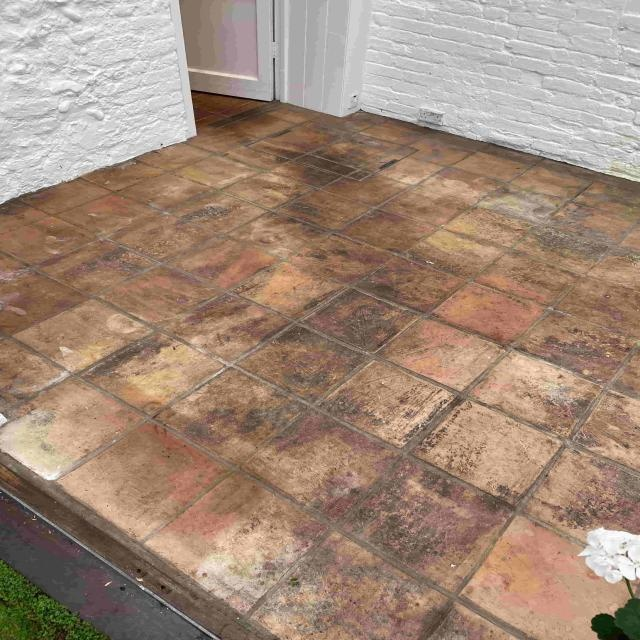

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/Terracotta-Floor-Before-Cleaning-Sandwich-Kent-8298_jpg.rf.aa8707d78f0d04882cb2c3d868a1f39c.jpg'):
      display(Image(filename=image_path, width=500))
      

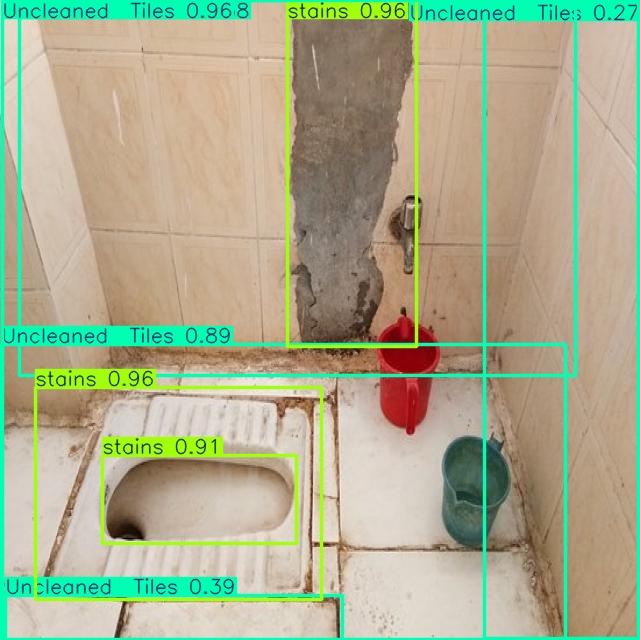

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/pankaj-hotel_jpg.rf.800e2b39a18d7872d5d0c95940eab78c.jpg'):
      display(Image(filename=image_path, width=500))
      